In [2]:
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(1, os.sep.join(["..", "packages"]))
from fractional_stable_motion import *
from alphastable import *
from ou_simulation import *

In [6]:
M[0, 0]

-0.2332926736542302

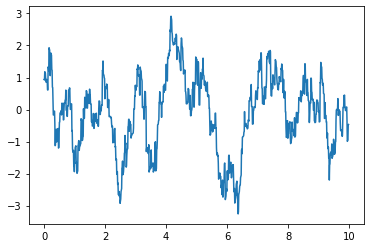

In [11]:
T, M = integral_form_ou_simulation()
plt.plot(T, M[0, :])